<a href="https://colab.research.google.com/github/agateknik/AIforCyberSecurity/blob/main/Try_Workbook_Network_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data loading

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


columns = ["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"]

# Step 2: Data analysis and exploration

https://www.kaggle.com/datasets/anushonkar/network-anamoly-detection

In [2]:
data = pd.read_csv("Train.txt", sep=",", names=columns)

In [3]:
data_test = pd.read_csv("Test.txt", sep=",", names=columns)

In [4]:
data.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


# Step 3: Data pre-processing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [6]:
data.shape

(125973, 43)

In [7]:
data.drop(['land','urgent','numfailedlogins','numoutboundcmds'], axis=1)

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,1,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [8]:
cleaned_data = data.drop(['land','urgent','numfailedlogins','numoutboundcmds'], axis=1)

In [9]:
cleaned_data.shape

(125973, 39)

In [10]:
cleaned_data.isna().sum()

,0
duration,0
protocoltype,0
service,0
flag,0
srcbytes,0
dstbytes,0
wrongfragment,0
hot,0
loggedin,0
numcompromised,0


In [ ]:
data.dropna(axis=1).shape #kalau mau menghilangkan axis 1 yang artinya ada nilai null

In [11]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   wrongfragment           125973 non-null  int64  
 7   hot                     125973 non-null  int64  
 8   loggedin                125973 non-null  int64  
 9   numcompromised          125973 non-null  int64  
 10  rootshell               125973 non-null  int64  
 11  suattempted             125973 non-null  int64  
 12  numroot                 125973 non-null  int64  
 13  numfilecreations        125973 non-null  int64  
 14  numshells           

In [12]:
cleaned_data.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [13]:
cleaned_data['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [14]:
cleaned_data['attack'] = np.where(cleaned_data['attack'] != "normal", "attack","normal")

In [15]:
cleaned_data['attack'].unique()

array(['normal', 'attack'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
cleaned_data['protocoltype'] = le.fit_transform(cleaned_data['protocoltype'])
cleaned_data['service'] = le.fit_transform(cleaned_data['service'])
cleaned_data['flag'] = le.fit_transform(cleaned_data['flag'])
cleaned_data['attack'] = le.fit_transform(cleaned_data['attack'])


In [19]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  int64  
 2   service                 125973 non-null  int64  
 3   flag                    125973 non-null  int64  
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   wrongfragment           125973 non-null  int64  
 7   hot                     125973 non-null  int64  
 8   loggedin                125973 non-null  int64  
 9   numcompromised          125973 non-null  int64  
 10  rootshell               125973 non-null  int64  
 11  suattempted             125973 non-null  int64  
 12  numroot                 125973 non-null  int64  
 13  numfilecreations        125973 non-null  int64  
 14  numshells           

<Axes: >

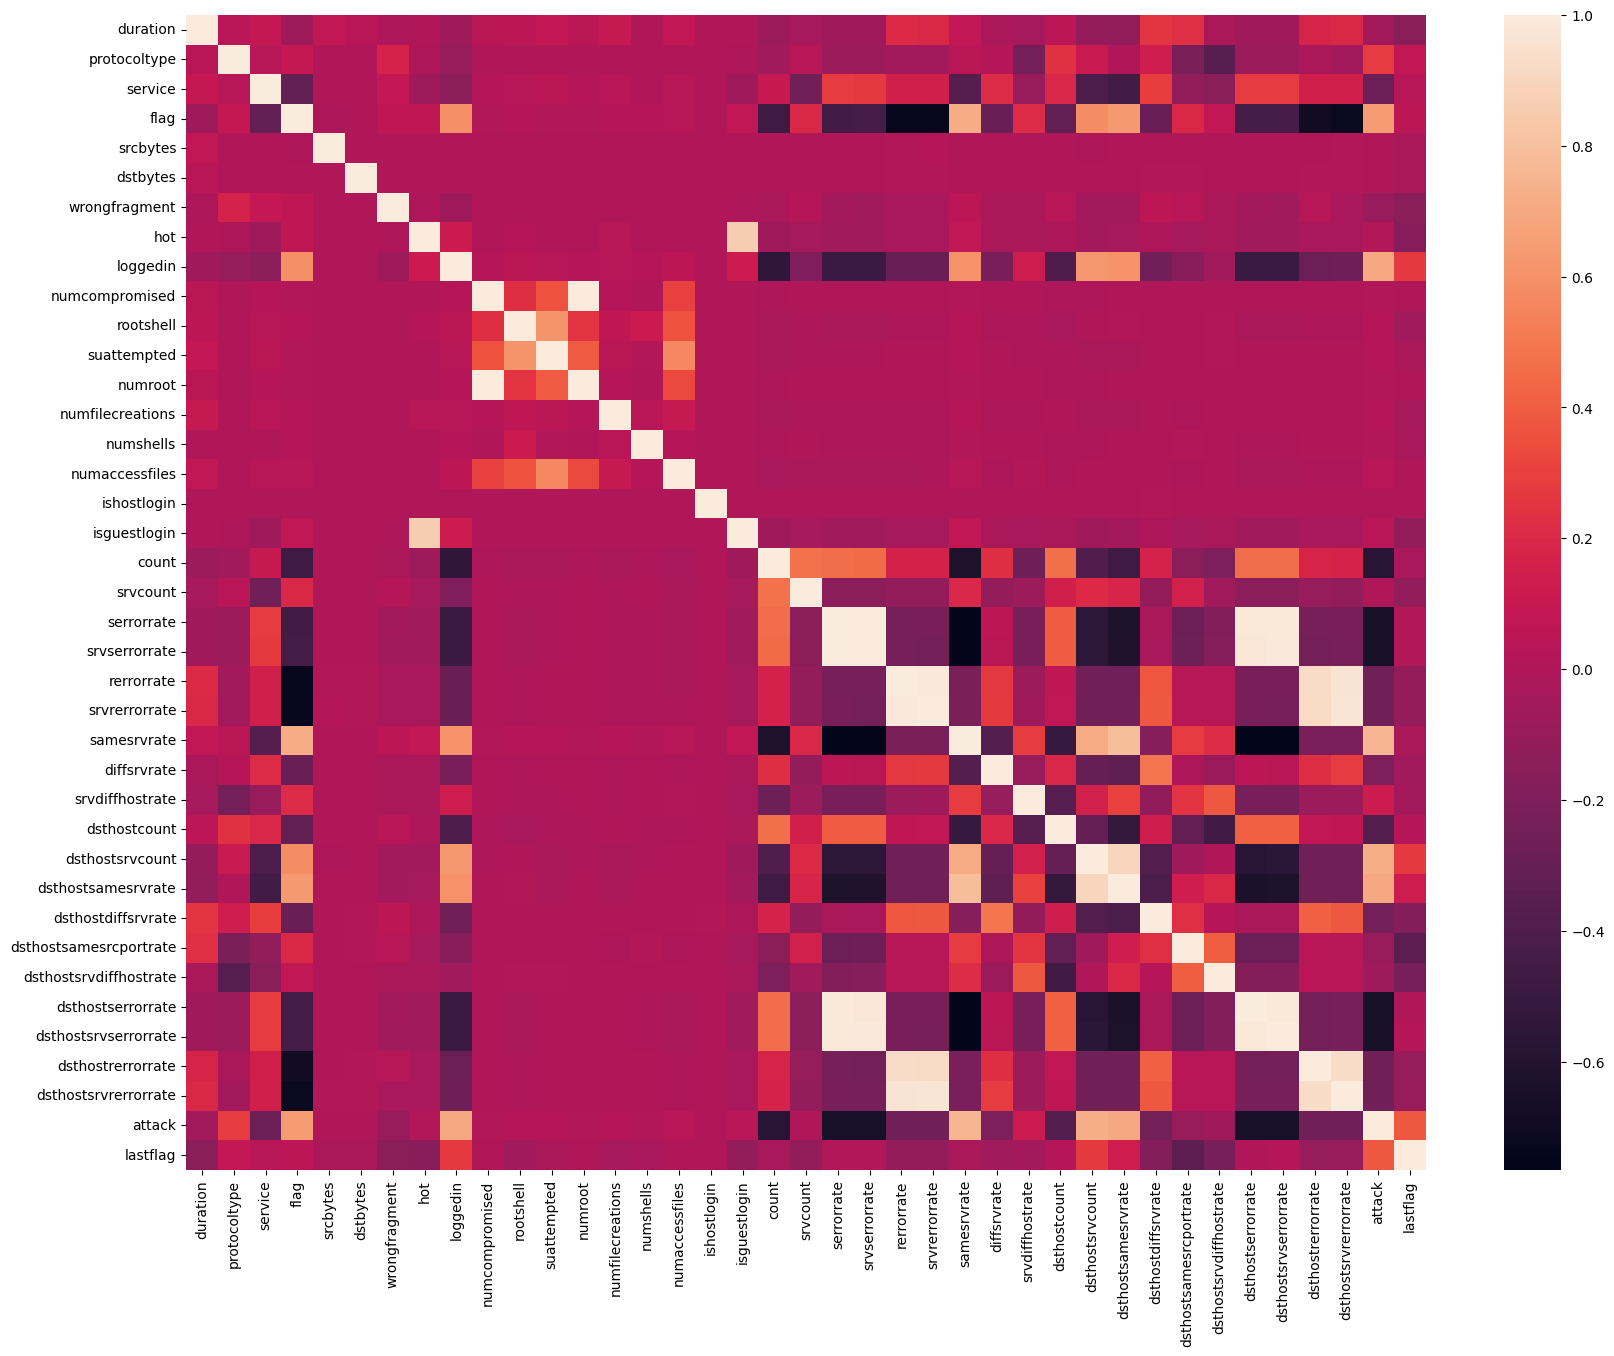

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(cleaned_data.corr())

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
X = cleaned_data.drop('attack', axis=1)

In [24]:
X_scaled = scaler.fit_transform(X)

In [25]:
y = cleaned_data['attack']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

In [28]:
X_train.shape

(94479, 38)

# Step 4: Training Logistic Regression algorithm

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
preds = lr.predict(X_test)

In [33]:
preds == y_test.values

array([ True,  True,  True, ...,  True,  True,  True])

In [34]:
sum(preds == y_test.values)/len(preds)

np.float64(0.9760589318600368)

# Step 5: Finding the best set of parameters - Hyperparameter optimization

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty' : ['l1','l2']
              }

In [37]:
lr = LogisticRegression()
gs_cv = GridSearchCV(lr, param_grid, cv=5)

In [38]:
gs_cv.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [39]:
gs_cv.best_params_

{'C': 100, 'penalty': 'l2'}

In [41]:
gs_cv.best_estimator_

LogisticRegression(C=100)

In [42]:
preds_new = gs_cv.best_estimator_.predict(X_test)

In [43]:
sum (preds_new == y_test.values)/len(preds_new)

np.float64(0.9770432463326348)